<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week06_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

1. Agus Prayogi (2141720025)

2. Diah Putri Nofianti (2141720054)

# Praktikum 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week06"

Mounted at /content/drive


# Praktikum 2

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

#Praktikum 3
Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart sesuai jobsheet dengan menggunakan gambar `lena.jpg`

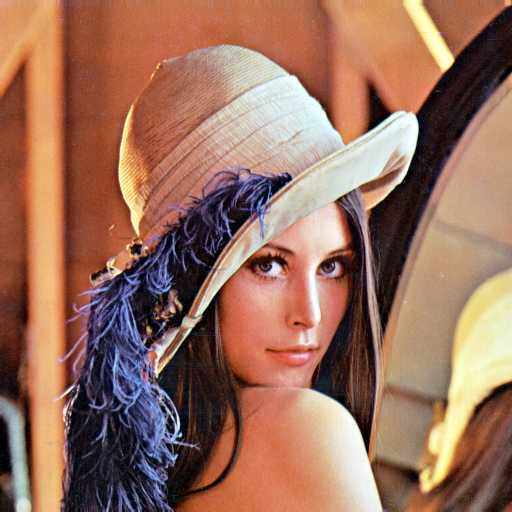

In [4]:
lena = cv.imread(f"{path}/lena.jpg")
cv2_imshow(lena)

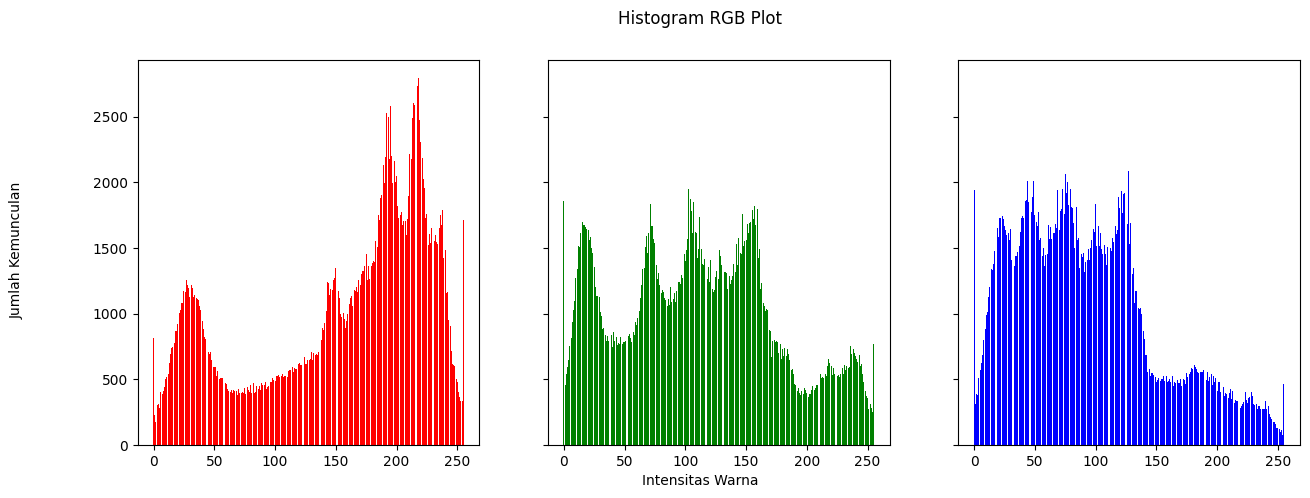

In [5]:
# Split gambar menjadi tiga channel warna
blue, green, red = cv.split(lena)

# Inisialisasi array untuk menghitung kemunculan intensitas warna
blue_histogram = [0] * 256
green_histogram = [0] * 256
red_histogram = [0] * 256

# Loop melalui setiap pixel dalam gambar
height, width = lena.shape[:2]
for y in range(height):
    for x in range(width):
        blue_histogram[blue[y][x]] += 1
        green_histogram[green[y][x]] += 1
        red_histogram[red[y][x]] += 1

# Membuat plot histogram RGB dalam tiga subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.03, 'Intensitas Warna', ha='center')

axs[0].bar(range(256), red_histogram, color='red')
axs[1].bar(range(256), green_histogram, color='green')
axs[2].bar(range(256), blue_histogram, color='blue')

plt.show()

#Praktikum 4
Setelah mengerjakan soal di atas, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu `histogram`. Bandingkan hasilnya. Apakah output muncul sama?

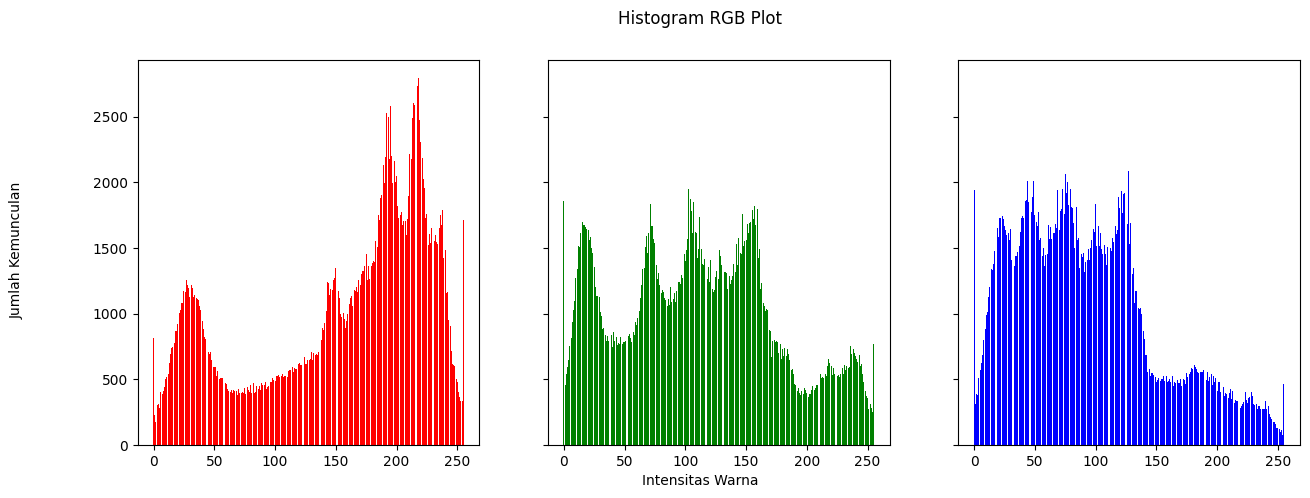

In [6]:
# Menghitung histogram untuk setiap channel warna menggunakan NumPy
blue_histogram, _ = np.histogram(blue, bins=np.arange(257))
green_histogram, _ = np.histogram(green, bins=np.arange(257))
red_histogram, _ = np.histogram(red, bins=np.arange(257))

# Membuat plot histogram RGB dalam tiga subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.03, 'Intensitas Warna', ha='center')

axs[0].bar(np.arange(256), red_histogram, color='red')
axs[1].bar(np.arange(256), green_histogram, color='green')
axs[2].bar(np.arange(256), blue_histogram, color='blue')

plt.show()

# Praktikum 5
Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart sesuai jobsheet dengan menggunakan gambar `lena_lc.jpg`

In [7]:
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1
            ax[1][img[y][x][1]] += 1
            ax[2][img[y][x][2]] += 1
    return ax

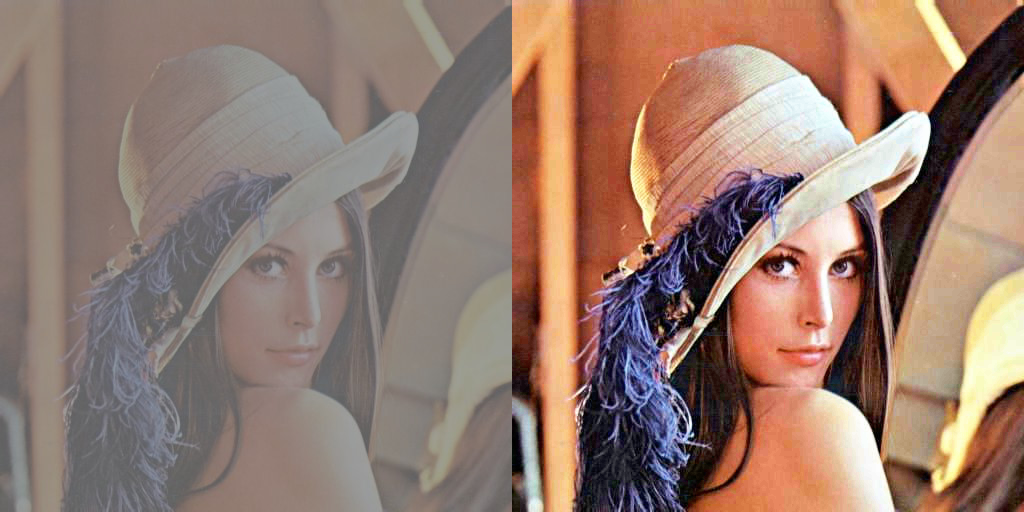

In [8]:
lena_lc = cv.imread(f'{path}/lena_lc.jpg')
# Menghitung histogram gambar asli lena lc
ori_histog = histog(lena_lc)

# Konversi gambar asli ke bentuk Numpy array
img_arr = np.asarray(lena_lc)

# Menghitung histogram gambar menggunakan np.bincount
histog_arr = np.bincount(img_arr.flatten(), minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histog_arr)
histog_arr = histog_arr / num_pixels

# Menghitung cumulative histogram
chistog_arr = np.cumsum(histog_arr)

# Membuat peta transformasi untuk equalization
transform_map = np.floor(255 * chistog_arr).astype(np.uint8)

# Mengubah gambar asli menggunakan peta transformasi
img_list = list(img_arr.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_arr.shape)
lena = eq_img_array

# Menghitung histogram gambar setelah equalization
equal_histo = histog(lena)

# Menggabungkan gambar asli dan gambar hasil equalization
final_frame = cv.hconcat((lena_lc, lena))
cv2_imshow(final_frame)

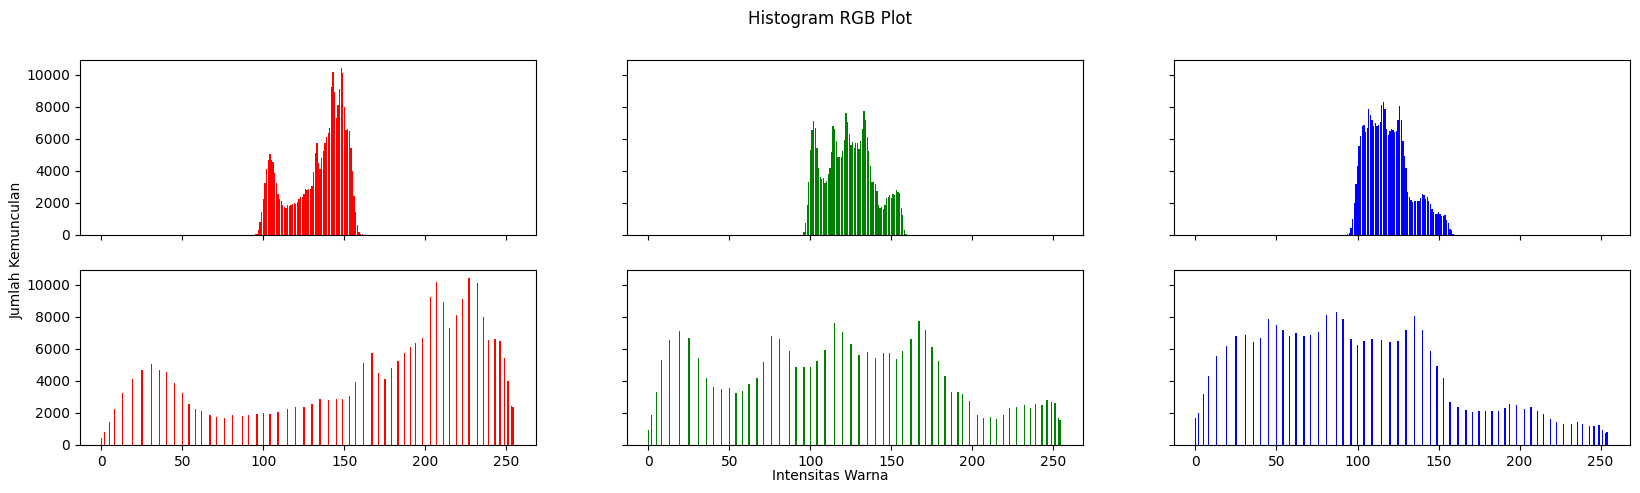

In [9]:
# membuat range untuk warna
color_ranges = np.arange(256)

# Mengonversi gambar asli dan hasil equalization menjadi grayscale
lena_lc_gray = cv.cvtColor(lena_lc, cv.COLOR_BGR2GRAY)
lena_gray = cv.cvtColor(lena, cv.COLOR_BGR2GRAY)

# Mengecek apakah gambar sudah dalam grayscale atau tidak
is_gray_img = np.array_equal(lena_lc_gray, lena_gray)

# Menampilkan plot histogram
if not is_gray_img:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(color_ranges, ori_histog[2], color='red')
    axs[0, 1].bar(color_ranges, ori_histog[1], color='green')
    axs[0, 2].bar(color_ranges, ori_histog[0], color='blue')
    axs[1, 0].bar(color_ranges, equal_histo[2], color='red')
    axs[1, 1].bar(color_ranges, equal_histo[1], color='green')
    axs[1, 2].bar(color_ranges, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(color_ranges, ori_histog[2], color='gray')
    axs[1].bar(color_ranges, equal_histo[2], color='gray')

plt.show()

# Praktikum 6
Setelah mengerjakan soal di atas, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu `equalizeHist`. Bandingkan
hasilnya. Apakah output muncul sama?

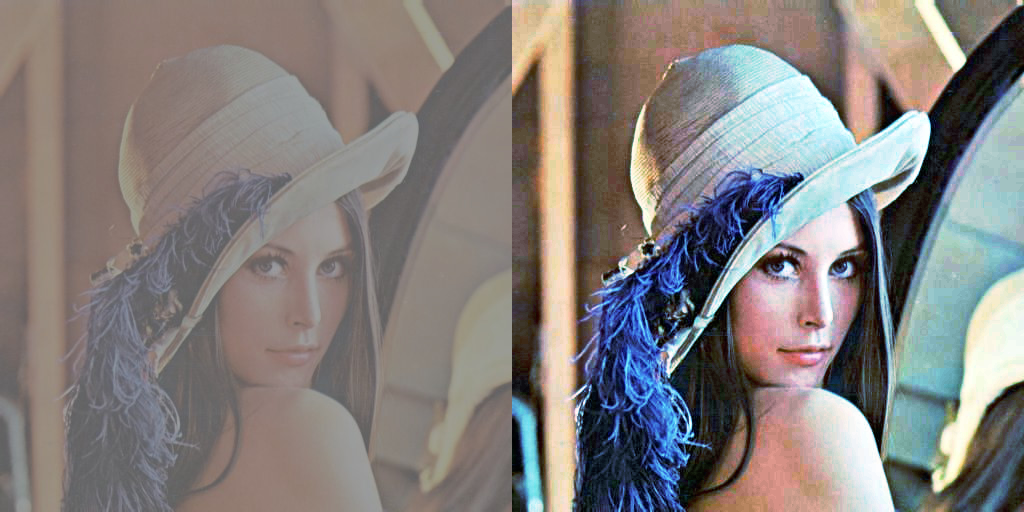

In [10]:
lena_lc = cv.imread(f"{path}/lena_lc.jpg")

# membagi gambar dalam bentuk warna (R, G, B)
blc, glc, rlc = cv.split(lena_lc)

# Melakukan equalization histogram pada setiap saluran warna (R, G, B)
equalized_blc = cv.equalizeHist(blc)
equalized_glc = cv.equalizeHist(glc)
equalized_rlc = cv.equalizeHist(rlc)

# menggabungkan hasil equalization RGB menjadi gambar yang utuh
equalized_lena = cv.merge((equalized_blc, equalized_glc, equalized_rlc))

# menggabungkan 2 gambar
final_frame = cv.hconcat((lena_lc, equalized_lena))
# menampilkan gambar
cv2_imshow(final_frame)

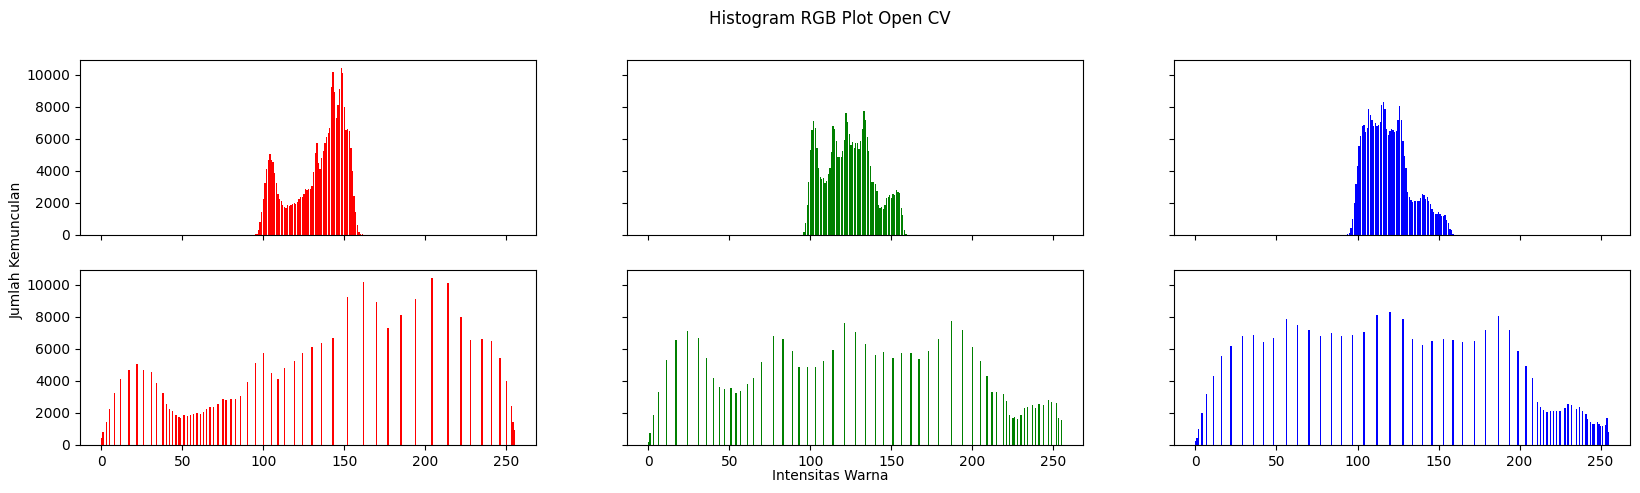

In [11]:
# membuat color histogram dari gambar diatas
ori_histog = histog(lena_lc)
equal_histo = histog(equalized_lena)

# membuat range untuk warna
color_ranges = np.arange(256)

# Mengonversi gambar asli dan hasil equalization menjadi grayscale
lena_lc_gray = cv.cvtColor(lena_lc, cv.COLOR_BGR2GRAY)
equalized_lena_gray = cv.cvtColor(equalized_lena, cv.COLOR_BGR2GRAY)

# Mengecek apakah gambar sudah dalam grayscale atau tidak
is_gray_img = np.array_equal(lena_lc_gray, equalized_lena_gray)

# Menampilkan plot histogram
if not is_gray_img:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot Open CV')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(color_ranges, ori_histog[2], color='red')
    axs[0, 1].bar(color_ranges, ori_histog[1], color='green')
    axs[0, 2].bar(color_ranges, ori_histog[0], color='blue')
    axs[1, 0].bar(color_ranges, equal_histo[2], color='red')
    axs[1, 1].bar(color_ranges, equal_histo[1], color='green')
    axs[1, 2].bar(color_ranges, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale Plot Open CV')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(color_ranges, ori_histog[2], color='gray')
    axs[1].bar(color_ranges, equal_histo[2], color='gray')

plt.show()

# Praktikum 7
Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart sesuai jobsheet dengan menggunakan gambar `lena.jpg`

In [12]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

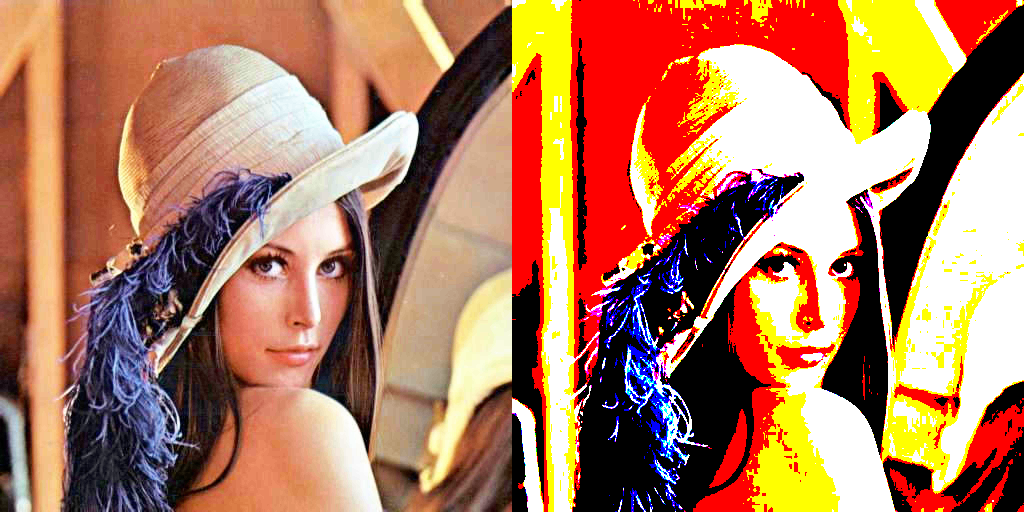

In [13]:
warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(lena, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

# Praktikum 8
Lakukanlah proses dithering Floyd and Steinberg (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart sesuai jobsheet dengan menggunakan gambar `lena.jpg`

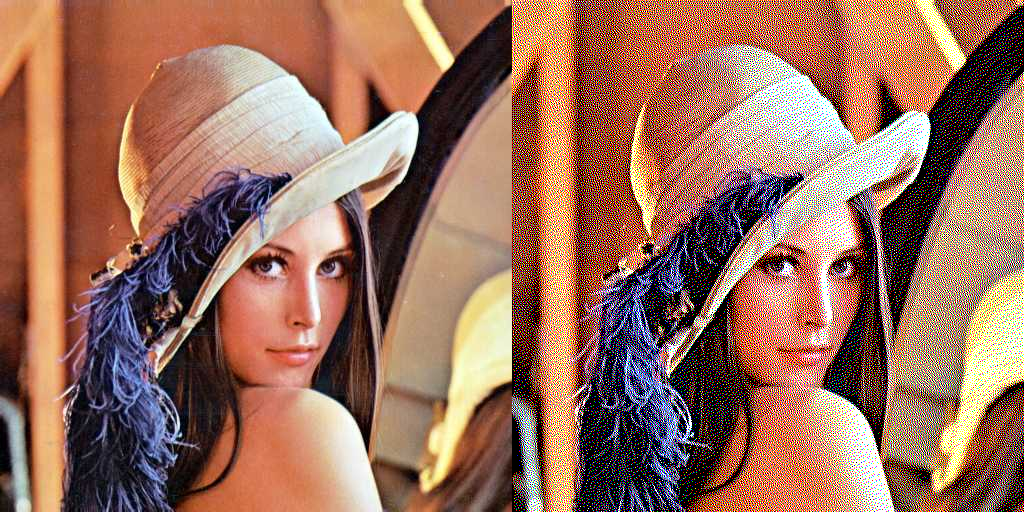

In [14]:
lena = cv.imread(f'{path}/lena.jpg')

# Konversi ke tipe float
img_float = np.float64(lena)

# mengambil Ukuran dan channel gambar
height, width, channels = lena.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_val = img_float[y, x, c]
            new_val = round(old_val / 255) * 255
            img_float[y, x, c] = new_val

            error = old_val - new_val

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
out = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
final = cv.hconcat((lena, out))
# menampilkan gambar yang sudah digabungkan
cv2_imshow(final)

# Praktikum 9
Menggunakan `lena_lc.jpg` rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg.

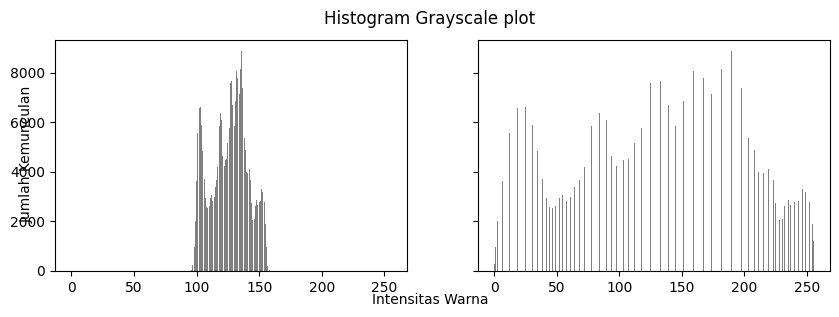

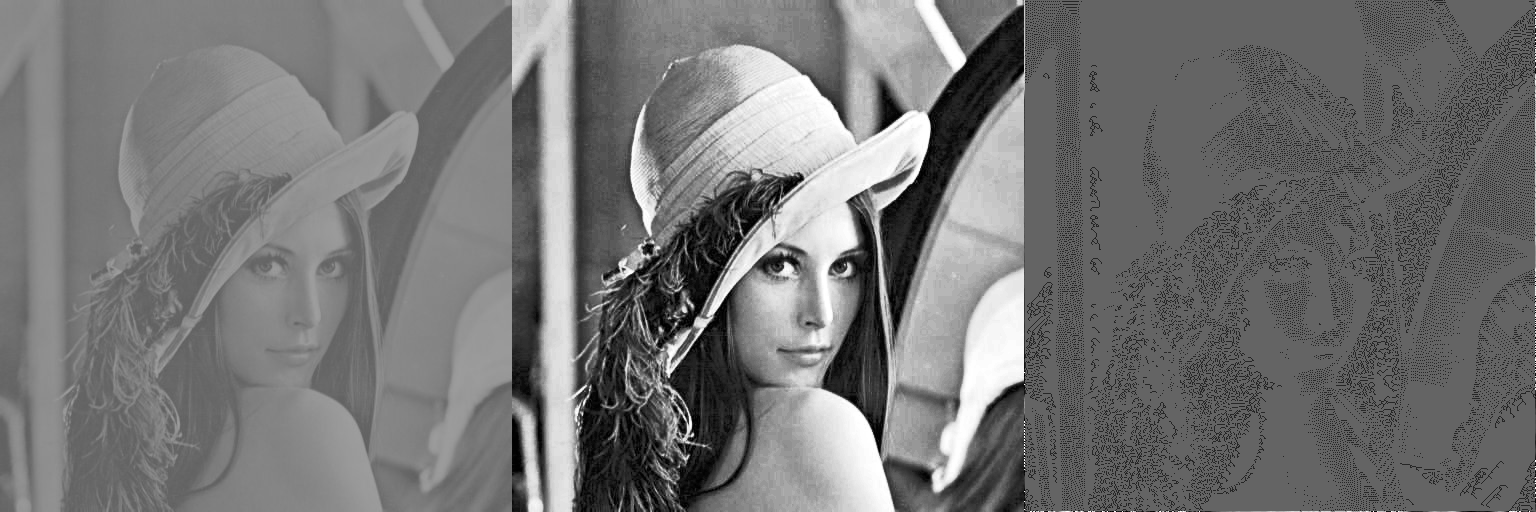

In [19]:
lena_lc = cv.imread(f"{path}/lena_lc.jpg", cv.IMREAD_GRAYSCALE)

# membuat image histogram equalization
equalized_image = cv.equalizeHist(lena_lc)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv.calcHist([lena_lc], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[10, 3], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')
plt.show()

# menggambungkan gambar lena_lc, hasil equalization, dan dithering
final = cv.hconcat((lena_lc, equalized_image, dithered_image))
# menampilkan gambar yang sudah digabungkan
cv2_imshow(final)